# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# other than these two, not importing any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> derive the class labels from given score</pre> y^{pred}= {[0 if y_score < 0.5 else 1]}

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, compute different thresholds and for each threshold compute TPR, FPR and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
a5 = pd.read_csv("5_a.csv")
a5.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


#### Step 1: Let's add proba scores for each prediction

In [4]:
a5["y_pred"] = [0 if x < 0.5 else 1 for x in a5.proba]
a5.head()

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


#### Step 2: Sort by proba scores

In [4]:
a5.sort_values(by=['proba'])
a5.head()

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


#### Step 3: Compute TPR, FPR and Confusion Matrix

In [5]:
def confusion_matrix(actual, pred):
    true_neg = sum([1 if (a == 0 and p == 0) else 0 for a,p in zip(actual, pred)])
    false_neg = sum([1 if (a == 1 and p == 0) else 0 for a,p in zip(actual, pred)])
    true_pos = sum([1 if (a == 1 and p == 1) else 0 for a,p in zip(actual, pred)])
    false_pos = sum([1 if (a == 0 and p == 1) else 0 for a,p in zip(actual, pred)])
    
    tpr = true_pos / (false_neg + true_pos)
    tnr = true_neg / (true_neg + false_pos)
    fpr = false_pos / (false_pos + true_neg)
    fnr = false_neg / (false_neg + true_pos)
    
    return true_neg, false_neg, true_pos, false_pos, tpr, tnr, fpr, fnr

In [6]:
a_true_neg, a_false_neg, a_true_pos, a_false_pos, a_tpr, a_tnr, a_fpr, a_fnr = confusion_matrix(a5.y, a5.y_pred)
print("True Negative : {0} \nFalse Negative : {1} \nTrue Positive : {2} \nFalse Positive : {3}".format(a_true_neg, a_false_neg, a_true_pos, a_false_pos))
print("True Positive Rate : {0} \nTrue Negative Rate : {1} \nFalse Positive Rate : {2} \nFalse Negative Rate : {3}".format(a_tpr, a_tnr, a_fpr, a_fnr))

True Negative : 0 
False Negative : 0 
True Positive : 10000 
False Positive : 100
True Positive Rate : 1.0 
True Negative Rate : 0.0 
False Positive Rate : 1.0 
False Negative Rate : 0.0


### Compute F1 Score

In [7]:
def f1_score(tp, fp, tpr):
    precision = tp / (tp + fp)
    recall = tpr
    f1 = 2 * ((precision * recall) / (precision + recall))
    return f1

In [8]:
a_f1 = f1_score(a_true_pos, a_false_pos, a_tpr)
print(f'F1 Score is : {a_f1}')

F1 Score is : 0.9950248756218906


### Get AUC Score

In [9]:
def roc_auc(a5):
    tpr_, fpr_ = [], []
    threshold = list(np.arange(0.0, 1.0, 0.01))
    for x in threshold:
        pred = [1 if (z > x) else 0 for z in a5.proba]
        true_neg, false_neg, true_pos, false_pos, tpr, tnr, fpr, fnr = confusion_matrix(a5.y, pred)
        tpr_.append(tpr)
        fpr_.append(fpr)
    tpr_.sort()
    fpr_.sort()
    auc = np.trapz(tpr_, fpr_)
    return auc, tpr_, fpr_

In [10]:
a_auc, auc_tpr, auc_fpr = roc_auc(a5)
print(f'AUC Score is: {a_auc}')

AUC Score is: 0.48755149999999997


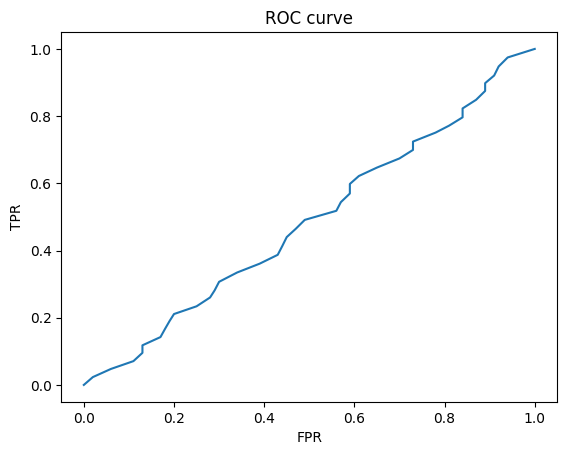

In [11]:
plt.plot(auc_fpr, auc_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title("ROC curve")
plt.show()

### Get Accuracy score

In [12]:
a_accuracy = (a_true_pos + a_true_neg) / (a_true_neg + a_false_neg + a_true_pos + a_false_pos)
print(f'Accuracy Score is: {a_accuracy}')

Accuracy Score is: 0.9900990099009901


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> derive the class labels from given score</pre> y^{pred} = {[0 if y_score < 0.5 else 1]}

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute TPR, FPR and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [13]:
b5 = pd.read_csv("5_b.csv")
b5.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [14]:
b5.y.value_counts()

y
0.0    10000
1.0      100
Name: count, dtype: int64

In [15]:
b5["y_pred"] = [0 if x < 0.5 else 1 for x in b5.proba]
b5.head()

,y,proba,y_pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [16]:
b_true_neg, b_false_neg, b_true_pos, b_false_pos, b_tpr, b_tnr, b_fpr, b_fnr = confusion_matrix(b5.y, b5.y_pred)
print("True Negative : {0} \nFalse Negative : {1} \nTrue Positive : {2} \nFalse Positive : {3}".format(b_true_neg, b_false_neg, b_true_pos, b_false_pos))
print("True Positive Rate : {0} \nTrue Negative Rate : {1} \nFalse Positive Rate : {2} \nFalse Negative Rate : {3}".format(b_tpr, b_tnr, b_fpr, b_fnr))

True Negative : 9761 
False Negative : 45 
True Positive : 55 
False Positive : 239
True Positive Rate : 0.55 
True Negative Rate : 0.9761 
False Positive Rate : 0.0239 
False Negative Rate : 0.45


In [17]:
b_f1 = f1_score(b_true_pos, b_false_pos, b_tpr)
b_f1

0.2791878172588833

In [18]:
b_auc, b_auc_tpr, b_auc_fpr = roc_auc(b5)
b_auc

0.937285

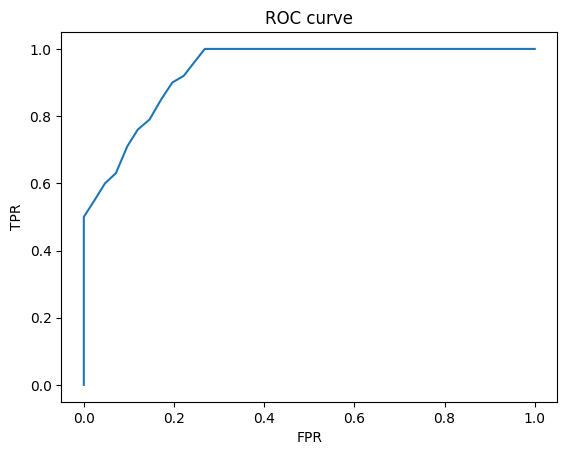

In [19]:
plt.plot(b_auc_fpr, b_auc_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title("ROC curve")
plt.show()

In [20]:
b_accuracy = (b_true_pos + b_true_neg) / (b_true_neg + b_false_neg + b_true_pos + b_false_pos)
b_accuracy

0.9718811881188119

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

Predict label of a data points like this: y^{pred} = {[0 if y_score < threshold  else 1]}

$ A = 500 * {number of false negative} + 100 * {numebr of false positive}

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [21]:
c5 = pd.read_csv("5_c.csv")
c5.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [22]:
c5.y.value_counts()

y
0    1805
1    1047
Name: count, dtype: int64

### Find best threshold

In [23]:
def c_roc_auc(a5):
    a = []
    threshold = list(np.arange(0.0, 1.0, 0.01))
    for x in threshold:
        #print(x)
        pred = [1 if z > x else 0 for z in a5.prob]
        true_neg, false_neg, true_pos, false_pos, tpr, tnr, fpr, fnr = confusion_matrix(a5.y, pred)
        #print(false_neg, false_pos)
        a_ = (500 * false_neg) + (100 * false_pos)
        a.append(a_)
    best_threshold = threshold[a.index(min(a))]
    return best_threshold  

In [24]:
bst_thrshld = c_roc_auc(c5)
print(f'The best threshold is: {bst_thrshld}')

The best threshold is: 0.23


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [25]:
d5 = pd.read_csv("5_d.csv")
d5.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


### Compute MSE

In [26]:
mse = np.square(np.subtract(d5.y, d5.pred)).mean() 
print(f'MSE is: {mse}')

MSE is: 177.16569974554707


### Compute MAPE

In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    e, a = [], []
    for x, y in zip(y_true, y_pred):
        e.append(abs(y-x))
        if x == 0:
            x = np.mean(y_true)
        a.append(abs(x))
    return np.mean(sum(e) / sum(a))

In [28]:
mape = mean_absolute_percentage_error(d5.y, d5.pred)
print(f'MAPE is: {mape}')

MAPE is: 0.12458927592474196


### Compute R-Squared error

In [29]:
def r_square(df):
    ss_tot, ss_res = [], []
    mean = np.mean(df.y)
    for x, y in zip(df.y, df.pred):
        ss_tot.append(np.square(x - mean))
        ss_res.append(np.square(x - y))
    return 1 - (sum(ss_res) / sum(ss_tot))

In [30]:
print(f'R-Squared is: {r_square(d5)}')

R-Squared is: 0.9563582786990964
